## Project Overview

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle, untuk mendapatkan dataset ini dapat diakses melalui link ini: <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data"><b> klik disini</b></a>. Dataset ini berisi informasi mengenai record data pasien yang memiliki masalah dengan jantung mereka, dataset ini dapat digunakan untuk memprediksi apakah pasien akan mengalami kegagalan jantung atau tidak. Tujuan utama dari projek ini adalah membuat model untuk memprediksi kematian akibat gagal jantung menggunakan konsep Classification dengan ensemble Model. Selain itu sebelum ke tujuan utama diperlukan beberapa proses seperti data cleaning, eksplorasi data, dan data preprocessing untuk memproses dataset agar siap dan dapat menghasilkan model klasifikasi yang optimal. Dataset ini memiliki dimensi sebesar 299 rows × 13 columns dengan semua fitur/kolom bertipe data numeric/continuous.

##### Final project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut :
* Mampu memahami konsep Classification dan Ensemble Model
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan ensemble model untuk membuat prediksi

#### Attribute Information :
1. age - umur pasien
2. anemia - apakah ada pengurangan hemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes di setiap kontraksi jantung
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

## Loading Dataset

In [3]:
df = pd.read_csv('./dataset/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


##### Keterangan :
* anemia : 0 = No, 1 = Yes
* diabetes : 0 = No, 1 = Yes
* high_blood_pressure : 0 = No, 1 = Yes
* sex : Gender of patient Male = 1, Female = 0
* smoking : 0 = No, 1 = Yes
* DEATH_EVENT : 0 = alive, 1 = death

## Data Cleaning & EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pada dataset terlihat bahwa semua fitur memiliki tipe data numeric/continuous.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dataset terlihat tidak banyak terdapat outliers

In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    299
dtype: int64

Tidak terdapat data yang kosong pada dataset

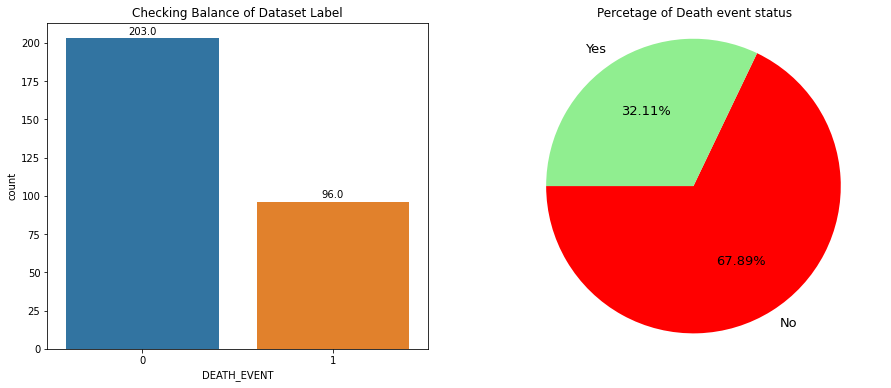

In [8]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x='DEATH_EVENT', data=df)
for i in ax.patches:
     ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
        
plt.subplot(122)
plt.title("Percetage of Death event status")
death_event_size = df['DEATH_EVENT'].value_counts().values.tolist()
death_event_label = 'No','Yes'
colors = ['red','lightgreen']
pcs, texts, autotexts = plt.pie(death_event_size, labels=death_event_label,colors=colors,
                             autopct='%2.2f%%', startangle=180)
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)
    
plt.axis('equal')
plt.show()


Terlihat bahwa data pada column DEATH_EVENT tidak seimbang.

 ###### Visualisasi distribusi data dari variable Kontinu

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


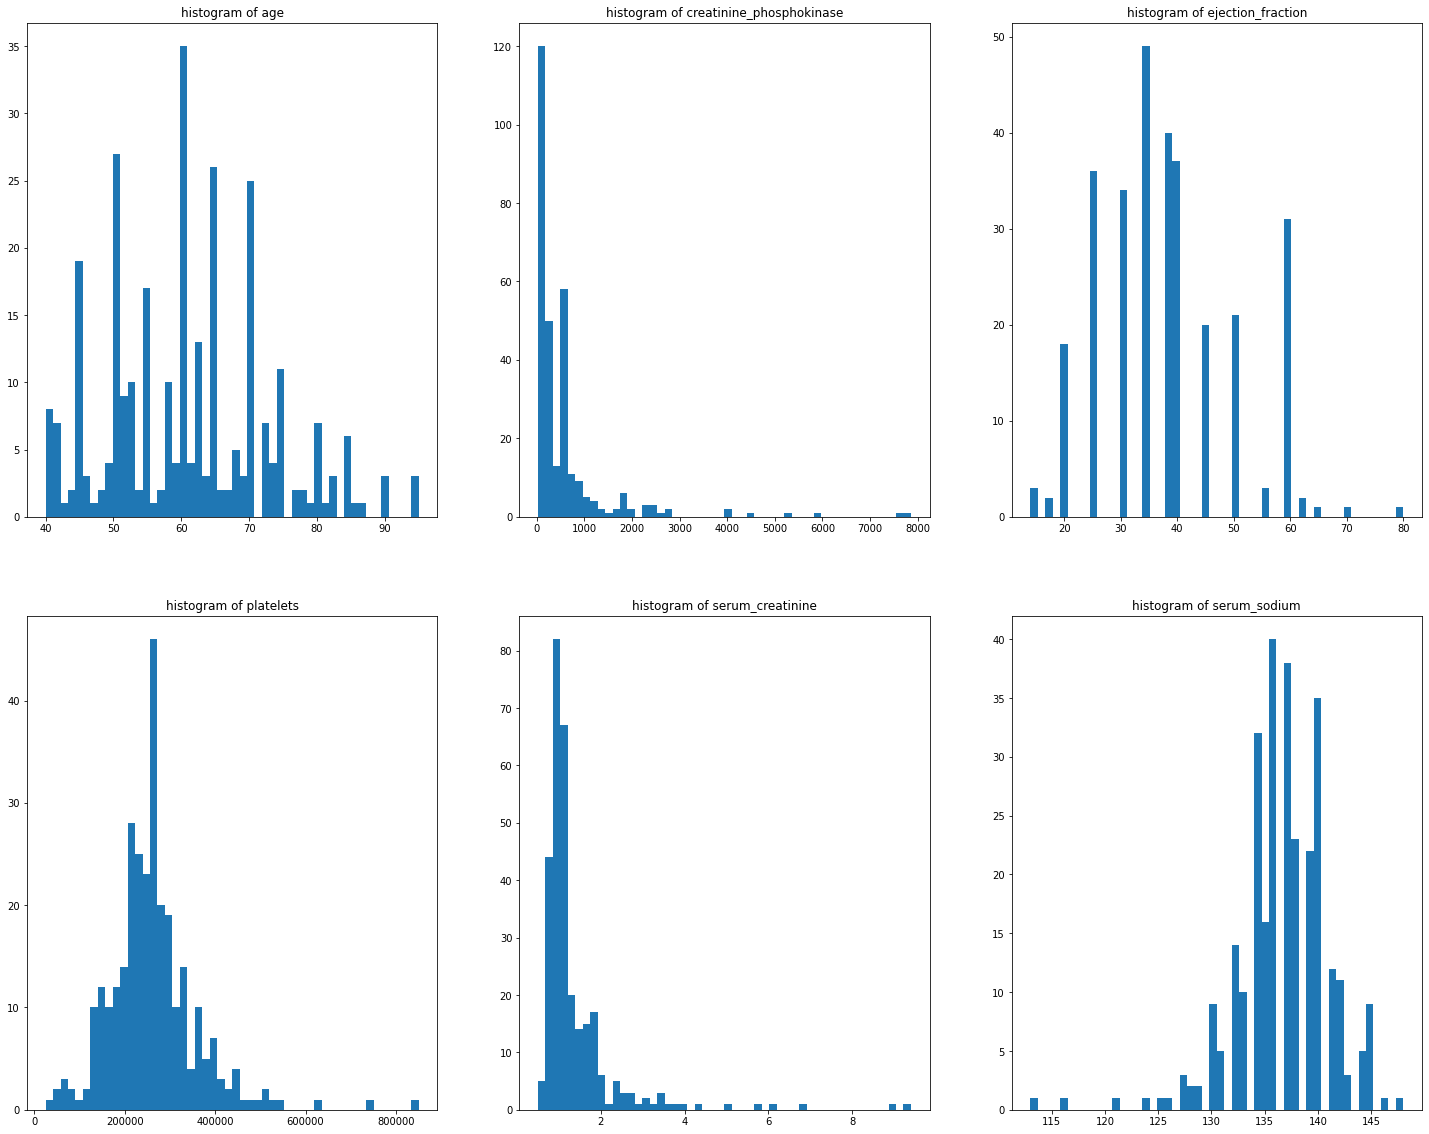

In [9]:
cols = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
print(cols)
fig, ax = plt.subplots(2,3, sharex=False, sharey=False, figsize=(25,20))
counts = 0
for col in cols:
    ax_x = counts//3
    ax_y = counts%3
    ax[ax_x, ax_y].hist(df[col],bins=50)
    ax[ax_x, ax_y].set_title(f"histogram of {col}")
    counts+=1
plt.show()

In [10]:
# plt.rcParams['figure.figsize']=(20,6)
# plt.subplot(121)
# plt.title("Distribusi usia pasien")
# sns.histplot(data=df['age'], bins=10, kde=True)

# plt.subplot(121)
# plt.title("")
# sns.lineplot()

* Pada kolom sex dan DEATH_EVENT memiliki nilai 0 dan 1, oleh karena itu untuk memudahkan dalam visualisasi dan analisis data pada kolom sex diganti nilai 0 = Female, 1=Male sedangkan untuk kolom DEATH_EVENT diganti dengan 0=alive, 1= death. agar tidak merubah data asli maka diperlukan kolom tambahan untuk perubahan tersebut

In [11]:
df['gender'] = df['sex'].replace({1:'Male', 0:'Female'})
df['death_status'] = df['DEATH_EVENT'].replace({1:'Death', 0:'Alive'})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,gender,death_status
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,Death
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,Death
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,Death
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,Death
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,Death


##### korelasi antara tiap variable kontinu

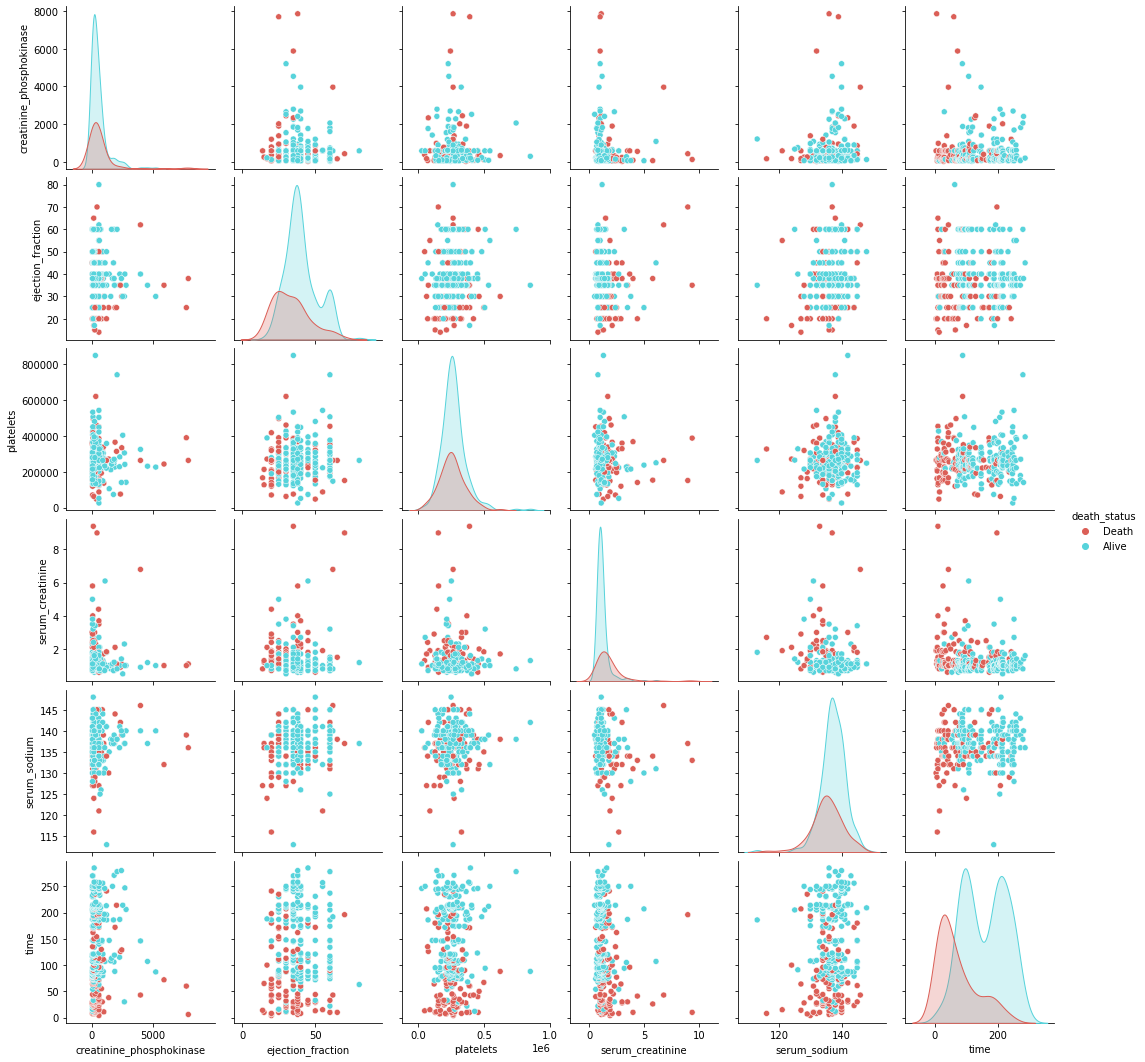

In [16]:
sns.pairplot(df[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium',
                'time','death_status']], hue='death_status', diag_kind='kde', kind='scatter',palette='hls')
plt.show()

warna merah menunjukkan terjadinya kejadian kematian dan warna biru tidak menunjukkan adanya kejadian kematian. untuk variabel time dengan variabel yang lain, semakin tinggi waktu follow up (dalam hari) semakin tinggi pula tingkat status pasien yang masih hidup. selain itu, scatter plot dan density plot telah menunjukkan perbedaan yang cukup jelas antara data kejadian kematian dan tidak ada kejadian kematian. untuk penjelasan lebih akan dilakukan visualisasi menggunakan boxplot.

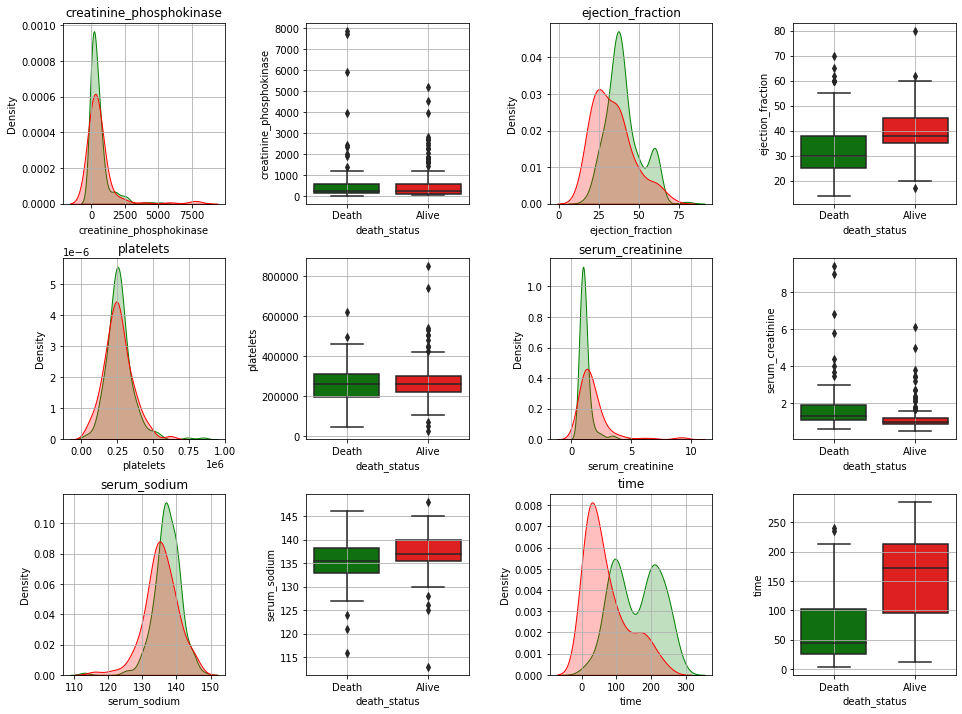

In [24]:
cols = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
plt.figure(figsize=(16,25))
for i, col in enumerate(cols):
    plt.subplot(6,4, i*2+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.3)
    plt.title(col)
    plt.grid()
    sns.kdeplot(df.loc[df['death_status']=='Alive',col],label='alive',color='green',shade=True,kernel='gau')
    sns.kdeplot(df.loc[df['death_status']=='Death',col],label='dead',color='red', shade=True,kernel='gau')
    plt.subplot(6,4,i*2+2)
    sns.boxplot(data=df,y=col,x='death_status', palette=['green','red'])
    plt.grid()
    

Terlihat pada visualisasi diatas bahwa tidak semua distribusi data adalah normal, beberapa data mengalami skewness dan terlihat adanya outliers

##### mencari mean dan median pada setiap variabel kontinu

In [30]:
mean_median_var = df.groupby('death_status')[cols].agg([np.mean,np.median])
mean_median_var

creatinine_phosphokinase        ejection_fraction         \
                                 mean median              mean median   
death_status                                                            
Alive                      540.054187    245          40.26601     38   
Death                      670.197917    259          33.46875     30   

                  platelets           serum_creatinine        serum_sodium  \
                       mean    median             mean median         mean   
death_status                                                                 
Alive         266657.489901  263000.0         1.184877    1.0   137.216749   
Death         256381.044792  258500.0         1.835833    1.3   135.375000   

                           time         
             median        mean median  
death_status                            
Alive         137.0  158.339901  172.0  
Death         135.5   70.885417   44.5

varibel time memiliki perbedaan yang cukup tinggi terhadap kejadian kematian

## Data Preprocessing

## Modeling

## Model Evaluation

## Conclusion